In [1]:
from hapi import*

HAPI version: 1.2.2.2
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2021 are now available in HAPI code

           MIT license: Copyright 2021 HITRAN team, see more at http://hitran.org. 

           If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005

           ATTENTION: This is the core version of the HITRAN Application Programming Interface.
                      For more efficient implementation of the absorption coefficient routine, 
                      as well as for new profiles, parameters and other functional,
      

In [2]:
db_begin('data')

Using data

H2O_13
                     Lines parsed: 170
H2O_07
                     Lines parsed: 585
H2O
                     Lines parsed: 251
CO2
                     Lines parsed: 129
H2O_14
                     Lines parsed: 251


In [3]:
#--- convert wavelengths to wavenumber
wl_start = 10.8e-6 #m
wl_end = 11.6e-6 #m

wn_start = round((1/wl_start)/100, 2) #cm-1
wn_end = round((1/wl_end)/100, 2) #cm-1

print('Wavenumbers from ' + str(wn_start) +' to '+ str(wn_end))

Wavenumbers from 925.93 to 862.07


In [4]:
#--- fetch(name of table with data, molecule number, isotopologue number, wavenumber start, wavenumber end)

fetch('H2O',1,1,wn_end,wn_start)


Data is fetched from http://hitran.org

BEGIN DOWNLOAD: H2O
  65536 bytes written to data/H2O.data
Header written to data/H2O.header
END DOWNLOAD
                     Lines parsed: 251
PROCESSED


In [5]:
tableList()

dict_keys(['sampletab', 'H2O_13', 'H2O_07', 'H2O', 'CO2', 'H2O_14'])

In [6]:
describeTable('H2O')

-----------------------------------------
H2O summary:
-----------------------------------------
Comment: 
Contains lines for H2(16O)
 in 862.070-925.930 wavenumber range
Number of rows: 251
Table type: column-fixed
-----------------------------------------
            PAR_NAME           PAR_FORMAT

            molec_id                  %2d
        local_iso_id                  %1d
                  nu               %12.6f
                  sw               %10.3E
                   a               %10.3E
           gamma_air                %5.4f
          gamma_self                %5.3f
              elower               %10.4f
               n_air                %4.2f
           delta_air                %8.6f
 global_upper_quanta                 %15s
 global_lower_quanta                 %15s
  local_upper_quanta                 %15s
  local_lower_quanta                 %15s
                ierr                  %6s
                iref                 %12s
    line_mixing_flag       

In [7]:
mol_id=1
iso_id=1
abundance(mol_id,iso_id)

0.9973173

HITRAN units = True means that we are using cm2 molec-1. If this were set to False, we would be using cm-1. 

In [8]:
nu,coef = absorptionCoefficient_Lorentz(SourceTables='H2O', Environment={'T':217.,'p':0.100666}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)
print(max(coef))

{'self': 1.0}
0.088008 seconds elapsed for abscoef; nlines = 251
5.804861591771796e-23


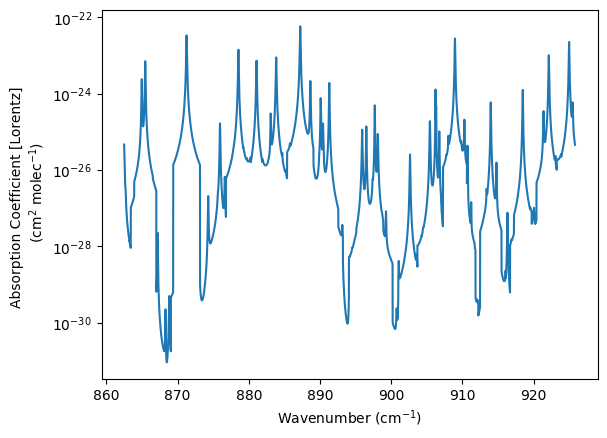

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.semilogy(nu,coef)
ax.set_xlabel('Wavenumber (cm$^{-1}$)')
ax.set_ylabel('Absorption Coefficient [Lorentz] \n (cm$^{2}$ molec$^{-1}$)')
plt.show()

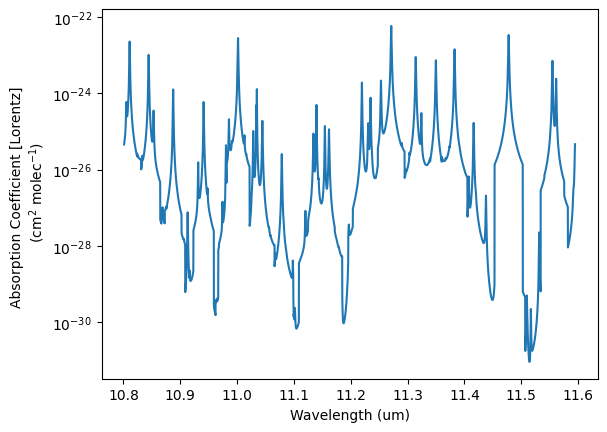

In [10]:
wl = (1/nu)/100*1e6 #m

fig, ax = plt.subplots()
ax.semilogy(wl,coef)
ax.set_xlabel('Wavelength (um)')
ax.set_ylabel('Absorption Coefficient [Lorentz] \n (cm$^{2}$ molec$^{-1}$)')
plt.show()

{'self': 1.0}
0.293455 seconds elapsed for abscoef; nlines = 585
{'self': 1.0}
0.078182 seconds elapsed for abscoef; nlines = 170
{'self': 1.0}
0.122546 seconds elapsed for abscoef; nlines = 251


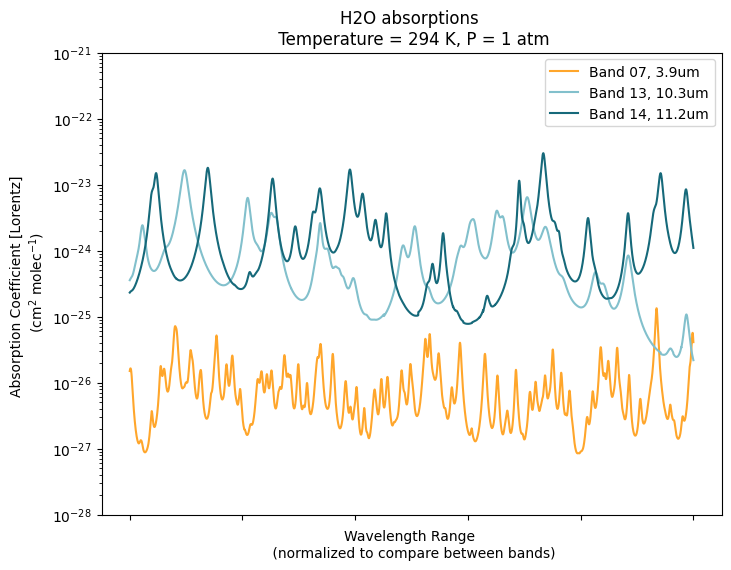

In [11]:
#--- Using surface-level temperature and pressure

nu_07,coef_07 = absorptionCoefficient_Lorentz(SourceTables='H2O_07', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)
nu_13,coef_13 = absorptionCoefficient_Lorentz(SourceTables='H2O_13', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)
nu_14,coef_14 = absorptionCoefficient_Lorentz(SourceTables='H2O_14', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)

nu_07_norm = (nu_07 - np.min(nu_07)) / (np.max(nu_07) - np.min(nu_07))
nu_13_norm = (nu_13 - np.min(nu_13)) / (np.max(nu_13) - np.min(nu_13))
nu_14_norm = (nu_14 - np.min(nu_14)) / (np.max(nu_14) - np.min(nu_14))


wl = (1/nu)/100*1e6 #m

fig, ax = plt.subplots(1, figsize=(8,6))
ax.semilogy(nu_07_norm,coef_07, label='Band 07, 3.9um', c='#FFA62B')
ax.semilogy(nu_13_norm,coef_13, label='Band 13, 10.3um', c='#82C0CC')
ax.semilogy(nu_14_norm,coef_14, label='Band 14, 11.2um', c='#16697A')
ax.legend()
ax.set_xticklabels([]) 
ax.set_ylim([10e-29, 10e-22])
ax.set_xlabel('Wavelength Range \n (normalized to compare between bands)')
ax.set_ylabel('Absorption Coefficient [Lorentz] \n (cm$^{2}$ molec$^{-1}$)')
ax.set_title('H2O absorptions \n Temperature = 294 K, P = 1 atm')
plt.show()

Converting the cm2 molec-1 to m2 kg-1:
* written out in Miller Time notes

In [12]:
#--- mass of water
m_water = 18.01528/1000 #kg mole-1
#--- mole
molec_mole = 6.022e23 #molec mole-1
#--- kg molec-1
kg_molec = m_water*(1/molec_mole)

print(kg_molec)

2.991577548987048e-26


{'self': 1.0}
0.302097 seconds elapsed for abscoef; nlines = 585
{'self': 1.0}
0.075584 seconds elapsed for abscoef; nlines = 170
{'self': 1.0}
0.109110 seconds elapsed for abscoef; nlines = 251


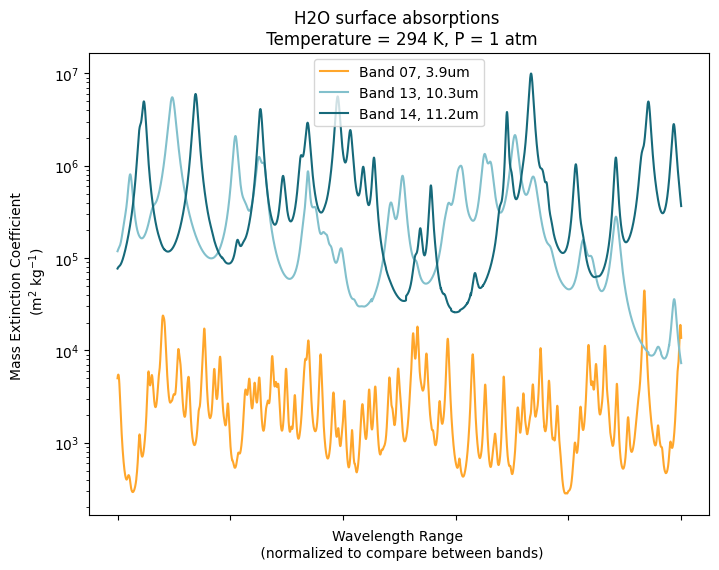

In [13]:
#--- Using surface-level temperature and pressure

nu_07,coef_07 = absorptionCoefficient_Lorentz(SourceTables='H2O_07', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)
nu_13,coef_13 = absorptionCoefficient_Lorentz(SourceTables='H2O_13', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)
nu_14,coef_14 = absorptionCoefficient_Lorentz(SourceTables='H2O_14', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)

#--- convert cm2/molec to m2/kg
mass_ext_07 = (coef_07*100**2)/kg_molec
mass_ext_13 = (coef_13*100**2)/kg_molec
mass_ext_14 = (coef_14*100**2)/kg_molec

fig, ax = plt.subplots(1, figsize=(8,6))
ax.semilogy(nu_07_norm,mass_ext_07, label='Band 07, 3.9um', c='#FFA62B')
ax.semilogy(nu_13_norm,mass_ext_13, label='Band 13, 10.3um', c='#82C0CC')
ax.semilogy(nu_14_norm,mass_ext_14, label='Band 14, 11.2um', c='#16697A')
ax.legend()
ax.set_xticklabels([]) 
#ax.set_ylim([10e20, 10e26])
ax.set_xlabel('Wavelength Range \n (normalized to compare between bands)')
ax.set_ylabel('Mass Extinction Coefficient \n (m$^{2}$ kg$^{-1}$)')
ax.set_title('H2O surface absorptions \n Temperature = 294 K, P = 1 atm')
plt.show()


Using the 1/cm units instead:

{'self': 1.0}
0.228283 seconds elapsed for abscoef; nlines = 585
{'self': 1.0}
0.060559 seconds elapsed for abscoef; nlines = 170
{'self': 1.0}
0.095373 seconds elapsed for abscoef; nlines = 251


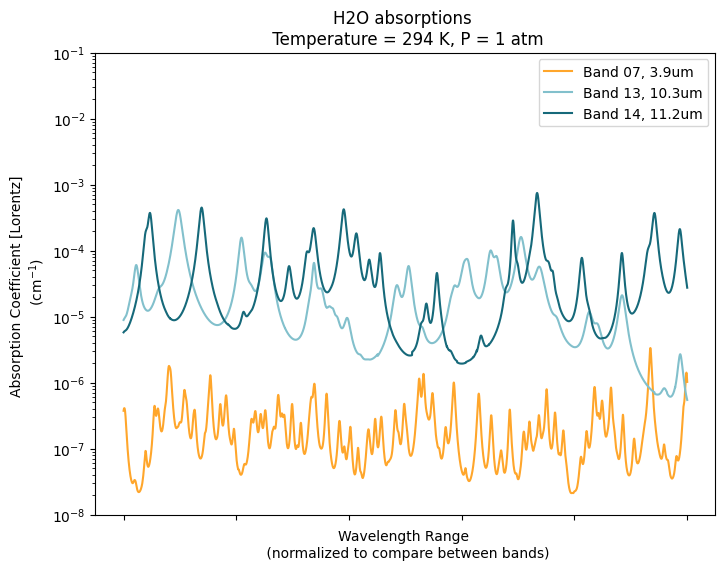

In [14]:
#--- Using surface-level temperature and pressure
nu_07,coef_07 = absorptionCoefficient_Lorentz(SourceTables='H2O_07', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=False)
nu_13,coef_13 = absorptionCoefficient_Lorentz(SourceTables='H2O_13', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=False)
nu_14,coef_14 = absorptionCoefficient_Lorentz(SourceTables='H2O_14', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=False)


nu_07_norm = (nu_07 - np.min(nu_07)) / (np.max(nu_07) - np.min(nu_07))
nu_13_norm = (nu_13 - np.min(nu_13)) / (np.max(nu_13) - np.min(nu_13))
nu_14_norm = (nu_14 - np.min(nu_14)) / (np.max(nu_14) - np.min(nu_14))


wl = (1/nu)/100*1e6 #m

fig, ax = plt.subplots(1, figsize=(8,6))
ax.semilogy(nu_07_norm,coef_07, label='Band 07, 3.9um', c='#FFA62B')
ax.semilogy(nu_13_norm,coef_13, label='Band 13, 10.3um', c='#82C0CC')
ax.semilogy(nu_14_norm,coef_14, label='Band 14, 11.2um', c='#16697A')
ax.legend()
ax.set_xticklabels([]) 
ax.set_ylim([10e-9, 10e-2])
ax.set_xlabel('Wavelength Range \n (normalized to compare between bands)')
ax.set_ylabel('Absorption Coefficient [Lorentz] \n (cm$^{-1}$)')
ax.set_title('H2O absorptions \n Temperature = 294 K, P = 1 atm')
plt.show()

Creating a look-up-table of mass extinction coefficients (K) by the input temperature and pressure:

In [15]:
#--- Set the standard colorbar ranges for the plots
ext_min=0
ext_max=600_000

In [16]:
#--- Setting the temperature and pressure ranges
T07 = np.arange(174, 294, 10)
p07 = np.arange(1, 0, -0.1)  # Adjusted pressure range

# Initialize empty lists to store results
mass_ext_avg07 = []

# Loop through temperature and pressure combinations
for temp in T07:
    for pres in p07:
        nu_07, coef_07 = absorptionCoefficient_Lorentz(SourceTables='H2O_07', Environment={'T': temp, 'p': pres}, Diluent={'self': 1.0}, WavenumberStep=0.001, HITRAN_units=True)
        mass_ext_07 = (coef_07 * 100 ** 2) / kg_molec
        mass_ext_avg07.append(np.mean(mass_ext_07))  # Calculate and store the average mass_ext_07
        print('temp:', temp, 'press:', pres, 'mass ext average:', np.mean(mass_ext_07))

# Reshape the average mass_ext_07 for plotting
mass_ext_avg07 = np.array(mass_ext_avg07).reshape(len(T07), len(p07))

{'self': 1.0}
0.247632 seconds elapsed for abscoef; nlines = 585
temp: 174 press: 1.0 mass ext average: 79.6578535128149
{'self': 1.0}
0.246512 seconds elapsed for abscoef; nlines = 585
temp: 174 press: 0.9 mass ext average: 79.721447939976
{'self': 1.0}
0.236905 seconds elapsed for abscoef; nlines = 585
temp: 174 press: 0.8 mass ext average: 79.78309081132164
{'self': 1.0}
0.221805 seconds elapsed for abscoef; nlines = 585
temp: 174 press: 0.7000000000000001 mass ext average: 79.85172162056561
{'self': 1.0}
0.221396 seconds elapsed for abscoef; nlines = 585
temp: 174 press: 0.6000000000000001 mass ext average: 79.92982189753864
{'self': 1.0}
0.212643 seconds elapsed for abscoef; nlines = 585
temp: 174 press: 0.5000000000000001 mass ext average: 80.01208628161848
{'self': 1.0}
0.202961 seconds elapsed for abscoef; nlines = 585
temp: 174 press: 0.40000000000000013 mass ext average: 80.10471583101814
{'self': 1.0}
0.196202 seconds elapsed for abscoef; nlines = 585
temp: 174 press: 0.3000

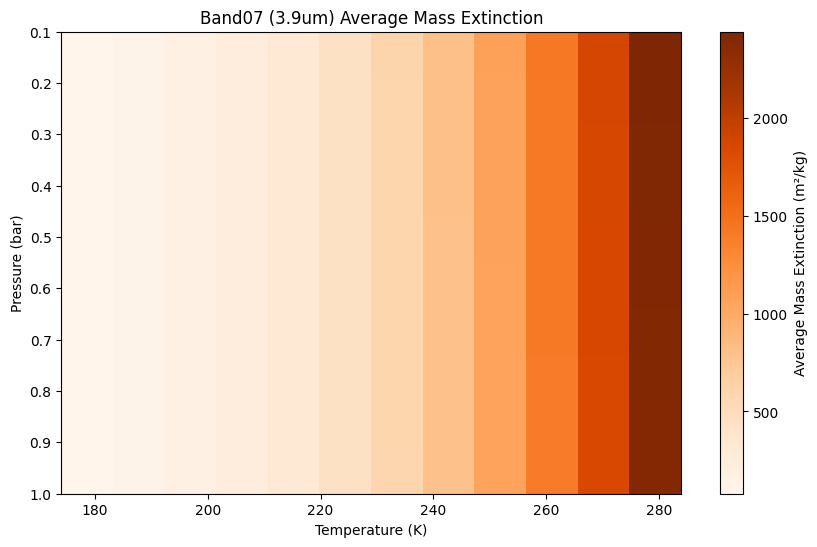

In [17]:
# Plot
plt.figure(figsize=(10, 6))

img = plt.imshow(np.transpose(mass_ext_avg07), extent=[T07[0], T07[-1], p07[0], p07[-1]], aspect='auto', origin='lower', cmap='Oranges')
img.set_clim(vmin=np.min(mass_ext_avg07), vmax=np.max(mass_ext_avg07))

plt.colorbar(img, label='Average Mass Extinction (m²/kg)')
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (bar)')
plt.title('Band07 (3.9um) Average Mass Extinction')
plt.show()

In [18]:
#--- Setting the temperature and pressure ranges
T14 = np.arange(174, 294, 10)
p14 = np.arange(1, 0, -0.1)  # Adjusted pressure range

# Initialize empty lists to store results
mass_ext_avg14 = []

# Loop through temperature and pressure combinations
for temp in T14:
    for pres in p14:
        nu_14, coef_14 = absorptionCoefficient_Lorentz(SourceTables='H2O_14', Environment={'T': temp, 'p': pres}, Diluent={'self': 1.0}, WavenumberStep=0.001, HITRAN_units=True)
        mass_ext_14 = (coef_14 * 100 ** 2) / kg_molec
        mass_ext_avg14.append(np.mean(mass_ext_14))  # Calculate and store the average mass_ext_07
        print('temp:', temp, 'press:', pres, 'mass ext average:', np.mean(mass_ext_14))

# Reshape the average mass_ext_07 for plotting
mass_ext_avg14 = np.array(mass_ext_avg14).reshape(len(T14), len(p14))

{'self': 1.0}
0.141834 seconds elapsed for abscoef; nlines = 251
temp: 174 press: 1.0 mass ext average: 29424.607754862922
{'self': 1.0}
0.109517 seconds elapsed for abscoef; nlines = 251
temp: 174 press: 0.9 mass ext average: 29492.94888904783
{'self': 1.0}
0.084662 seconds elapsed for abscoef; nlines = 251
temp: 174 press: 0.8 mass ext average: 29561.122776479406
{'self': 1.0}
0.092632 seconds elapsed for abscoef; nlines = 251
temp: 174 press: 0.7000000000000001 mass ext average: 29629.494735623797
{'self': 1.0}
0.094894 seconds elapsed for abscoef; nlines = 251
temp: 174 press: 0.6000000000000001 mass ext average: 29699.652877279037
{'self': 1.0}
0.096223 seconds elapsed for abscoef; nlines = 251
temp: 174 press: 0.5000000000000001 mass ext average: 29771.51158676405
{'self': 1.0}
0.115978 seconds elapsed for abscoef; nlines = 251
temp: 174 press: 0.40000000000000013 mass ext average: 29844.331871223127
{'self': 1.0}
0.104885 seconds elapsed for abscoef; nlines = 251
temp: 174 press

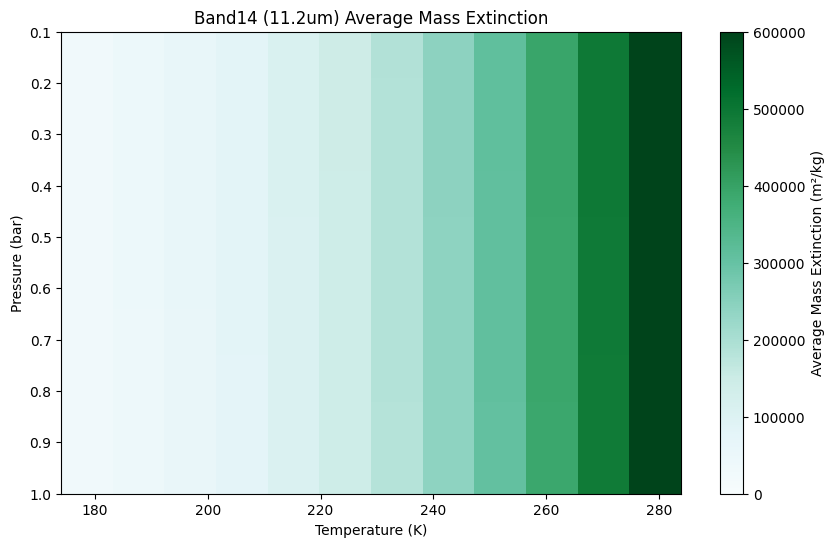

In [19]:
# Plot
plt.figure(figsize=(10, 6))

img = plt.imshow(np.transpose(mass_ext_avg14), extent=[T14[0], T14[-1], p14[0], p14[-1]], aspect='auto', origin='lower', cmap='BuGn')
img.set_clim(vmin=ext_min, vmax=ext_max)

plt.colorbar(img, label='Average Mass Extinction (m²/kg)')
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (bar)')
plt.title('Band14 (11.2um) Average Mass Extinction')
plt.show()

In [20]:
#--- Setting the temperature and pressure ranges
T13 = np.arange(174, 294, 10)
p13 = np.arange(1, 0, -0.1)  # Adjusted pressure range

# Initialize empty lists to store results
mass_ext_avg13 = []

# Loop through temperature and pressure combinations
for temp in T13:
    for pres in p13:
        nu_13, coef_13 = absorptionCoefficient_Lorentz(SourceTables='H2O_13', Environment={'T': temp, 'p': pres}, Diluent={'self': 1.0}, WavenumberStep=0.001, HITRAN_units=True)
        mass_ext_13 = (coef_13 * 100 ** 2) / kg_molec
        mass_ext_avg13.append(np.mean(mass_ext_13))  # Calculate and store the average mass_ext_07
        print('temp:', temp, 'press:', pres, 'mass ext average:', np.mean(mass_ext_13))

# Reshape the average mass_ext_07 for plotting
mass_ext_avg13 = np.array(mass_ext_avg13).reshape(len(T13), len(p13))

{'self': 1.0}
0.069929 seconds elapsed for abscoef; nlines = 170
temp: 174 press: 1.0 mass ext average: 8451.597626973813
{'self': 1.0}
0.059179 seconds elapsed for abscoef; nlines = 170
temp: 174 press: 0.9 mass ext average: 8469.672827746495
{'self': 1.0}
0.057457 seconds elapsed for abscoef; nlines = 170
temp: 174 press: 0.8 mass ext average: 8487.7084977877
{'self': 1.0}
0.059663 seconds elapsed for abscoef; nlines = 170
temp: 174 press: 0.7000000000000001 mass ext average: 8504.987039675265
{'self': 1.0}
0.054587 seconds elapsed for abscoef; nlines = 170
temp: 174 press: 0.6000000000000001 mass ext average: 8521.892172650936
{'self': 1.0}
0.060878 seconds elapsed for abscoef; nlines = 170
temp: 174 press: 0.5000000000000001 mass ext average: 8537.240402108673
{'self': 1.0}
0.056613 seconds elapsed for abscoef; nlines = 170
temp: 174 press: 0.40000000000000013 mass ext average: 8550.829581451919
{'self': 1.0}
0.054970 seconds elapsed for abscoef; nlines = 170
temp: 174 press: 0.300

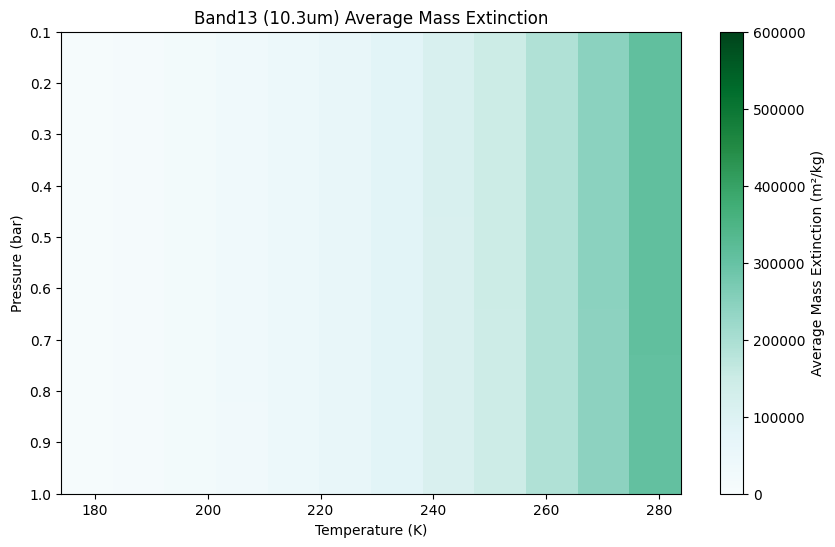

In [21]:
# Plot
plt.figure(figsize=(10, 6))

img = plt.imshow(np.transpose(mass_ext_avg13), extent=[T13[0], T13[-1], p13[0], p13[-1]], aspect='auto', origin='lower', cmap='BuGn')
img.set_clim(vmin=ext_min, vmax=ext_max)

plt.colorbar(img, label='Average Mass Extinction (m²/kg)')
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (bar)')
plt.title('Band13 (10.3um) Average Mass Extinction')
plt.show()